Construct a GMOT:

In [1]:
from MOTorNOT.gmot import gratingMOT
from MOTorNOT.coils import QuadrupoleCoils
import numpy as np

coils = QuadrupoleCoils(radius=0.1, offset=0.1, turns=50, current=50, axis=2, deltaI=0)
linewidth = 2*np.pi*29e6

gmot = gratingMOT(position = 3e-3, 
                  alpha = 60, 
                  detuning = -linewidth/2, 
                  radius = 20e-3, 
                  power = 20e-3, 
                  handedness = -1, 
                  R1 = 0.33, 
                  field = coils.field,
                  sectors=3,
                  beam_type='uniform',
                  grating_radius=10e-3)
# gmot.plot('xz', limits=[(-12e-3, 12e-3), (-3e-3, 4e-3)], numpoints=80, quiver_scale=5)

In [3]:
from MOTorNOT.integration import Solver, generate_initial_conditions

X0, V0 = generate_initial_conditions(-0.05, np.linspace(1, 20, 20), phi=90, theta=90)

sol = Solver(gmot.acceleration, X0, V0).run(10e-2, dt=1e-4)
sol.plot(plane='xz', limits=[(-12e-3, 12e-3), (-3e-3, 4e-3)])

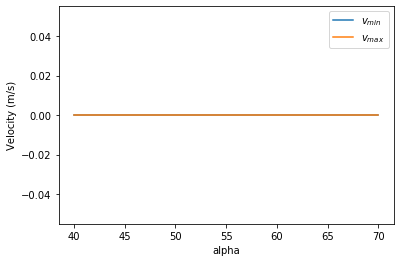

In [88]:
default = {'position': 2.5e-3,
                  'alpha': 60,
                  'detuning': -1.5*linewidth,
                  'radius': 12e-3,
                  'power': 50e-3,
                  'handedness': -1,
                  'R1': 0.25,
                  'field': coils.field,
                  'sectors': 4,
                  'beam_type': 'uniform',
                  'grating_radius': 10e-3
                  }

class Study:
    def __init__(self, name, start, stop, steps, default):
        self.name = name
        self.start = start
        self.stop = stop
        self.steps = steps
        self.default = default
        
    def run(self):
        params = self.default.copy()
        self.results = []
        self.values = np.linspace(self.start, self.stop, self.steps)
        for x in tqdm(self.values):
            params[self.name] = x
            gmot = gratingMOT(**params)
            X0, V0 = generate_initial_conditions(-0.05, np.linspace(1, 20, 50), phi=90, theta=90)
            sol = Solver(gmot.acceleration, X0, V0).run(5e-2, dt=2e-4)
            self.results = np.append(self.results, sol.capture_velocity()).reshape(-1, 2)


    def plot(self):
        plt.plot(self.values, self.results[:, 0], label=r'$v_{min}$')
        plt.plot(self.values, self.results[:, 1], label=r'$v_{max}$')
        plt.xlabel(self.name)
        plt.ylabel('Velocity (m/s)')
        plt.legend()

study = Study('alpha', start=40, stop=70, steps=10, default=default)
study.run()
study.plot()
